<a href="https://colab.research.google.com/github/NazarenoSiciliano/Data-science-I/blob/main/ProyectoDS_ParteI_Siciliano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python
# Casos dengue en CABA
Primer entrega

# 📌 Abstract
Este proyecto utiliza un conjunto de datos sobre casos de dengue en la Ciudad Autónoma de Buenos Aires (CABA), extraído de fuentes oficiales del gobierno de la Ciudad, cubriendo el período de 2024 a 2025. La base de datos contiene información detallada sobre la incidencia de la enfermedad, incluyendo datos demográficos de los pacientes, ubicación geográfica de los casos (comuna, barrio), fecha de diagnóstico, y variables clínicas y epidemiológicas relevantes.

El objetivo del proyecto es realizar un análisis exploratorio de los casos de dengue para identificar patrones, tendencias y factores de riesgo. Buscamos responder a preguntas clave como la evolución temporal de los casos, la distribución geográfica de los brotes y la segmentación de la población afectada por edad y género. Para ello, se aplican técnicas de análisis descriptivo y visualización de datos, utilizando librerías de Python como Pandas, Matplotlib y Seaborn.

El trabajo comienza con una etapa de limpieza y preprocesamiento de los datos, incluyendo la gestión de valores faltantes y la normalización de variables. A continuación, se desarrollan visualizaciones que permiten comprender la dinámica de la enfermedad y su impacto en la población de CABA. Este análisis exploratorio servirá como base para futuras investigaciones epidemiológicas, ayudando a las autoridades de salud a diseñar estrategias de prevención y control más efectivas.

# Preguntas / Hipótesis de interés

¿Cómo ha evolucionado la cantidad de casos de dengue a lo largo del tiempo
en CABA, con especial atención a las estacionalidades?

¿Cuáles son las comunas o barrios más afectados por la incidencia del dengue
¿Existen diferencias significativas en la distribución de casos por grupo etario y género?

¿Se puede identificar una correlación entre las características demográficas de los pacientes y la severidad de los casos?

¿Influyen variables ambientales o socioeconómicas en la distribución y el aumento de casos?
# Objetivo del Proyecto
El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar la cantidad de nuevos casos de dengue en CABA a partir de variables epidemiológicas y demográficas clave. El modelo considerará factores como la fecha del diagnóstico, la comuna y el barrio de residencia del paciente, y características como la edad y el género. Esta predicción facilitará la planificación de recursos sanitarios, la identificación temprana de zonas de riesgo y la optimización de campañas de prevención y, en última instancia, ayudará a las autoridades de salud a responder de manera más proactiva y efectiva ante futuros brotes.


#Visualizaciones y Análisis

In [17]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')
# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_dengue.csv', delimiter=';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ano,semana_epidemiologica,fecha_inicio_semana_epidemiologica,grupo_etario,departamento_residencia,n_confirmados,fecha_semana_epidemiologica
0,2024,31,28/7/2024,SIN DATO,SIN DATO,0,2024-W31
1,2024,32,4/8/2024,SIN DATO,SIN DATO,0,2024-W32
2,2024,33,11/8/2024,SIN DATO,SIN DATO,0,2024-W33
3,2024,34,18/8/2024,SIN DATO,SIN DATO,0,2024-W34
4,2024,35,25/8/2024,SIN DATO,SIN DATO,0,2024-W35


#Valores perdidos


In [18]:
sin_dato_por_columna = df.apply(lambda x: x.eq("SIN DATO").sum())
print("Conteo de valores 'SIN DATO' por columna:")
print(sin_dato_por_columna)

Conteo de valores 'SIN DATO' por columna:
ano                                    0
semana_epidemiologica                  0
fecha_inicio_semana_epidemiologica     0
grupo_etario                          28
departamento_residencia               32
n_confirmados                          0
fecha_semana_epidemiologica            0
dtype: int64


Se observa que hay valores faltantes en columnas como grupo_etario,departamento_residencia. Se dejarán o imputarán según necesidad del análisis.

# 1. Gráfico de Evolución Temporal

Este gráfico muestra la evolución del brote semana a semana, evidenciando el patrón estacional y el pico de la epidemia.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


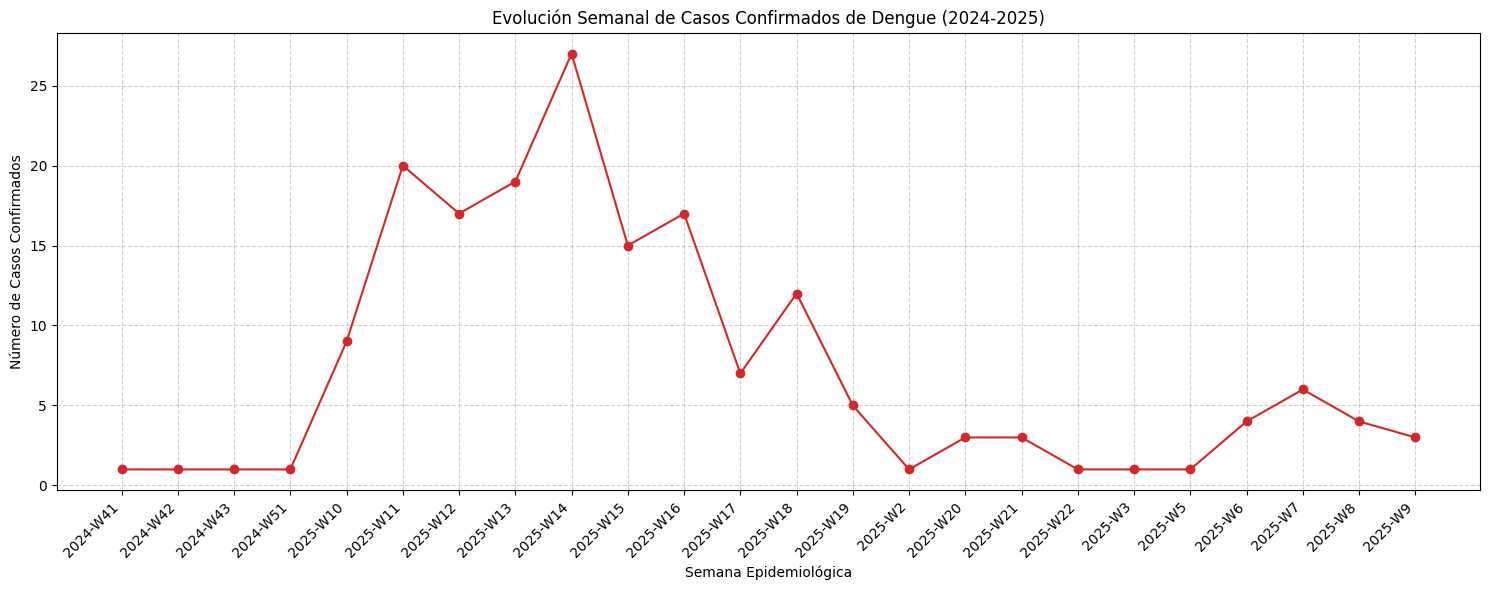

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_dengue.csv', delimiter=';')

df['n_confirmados'] = pd.to_numeric(df['n_confirmados'], errors='coerce')

df_time = df.groupby('fecha_semana_epidemiologica')['n_confirmados'].sum().reset_index()
df_time = df_time.sort_values(by='fecha_semana_epidemiologica')
df_plot_time = df_time[df_time['n_confirmados'] > 0].copy()

plt.figure(figsize=(15, 6))
plt.plot(df_plot_time['fecha_semana_epidemiologica'], df_plot_time['n_confirmados'], marker='o', linestyle='-', color='tab:red')
plt.title('Evolución Semanal de Casos Confirmados de Dengue (2024-2025)')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Número de Casos Confirmados')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Gráfico de Distribución Geográfica

Este gráfico permite identificar rápidamente las Comunas con mayor incidencia, como la Comuna 11.

/tmp/ipython-input-2765050486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departamento_residencia', y='n_confirmados', data=df_geo_plot, palette='viridis')


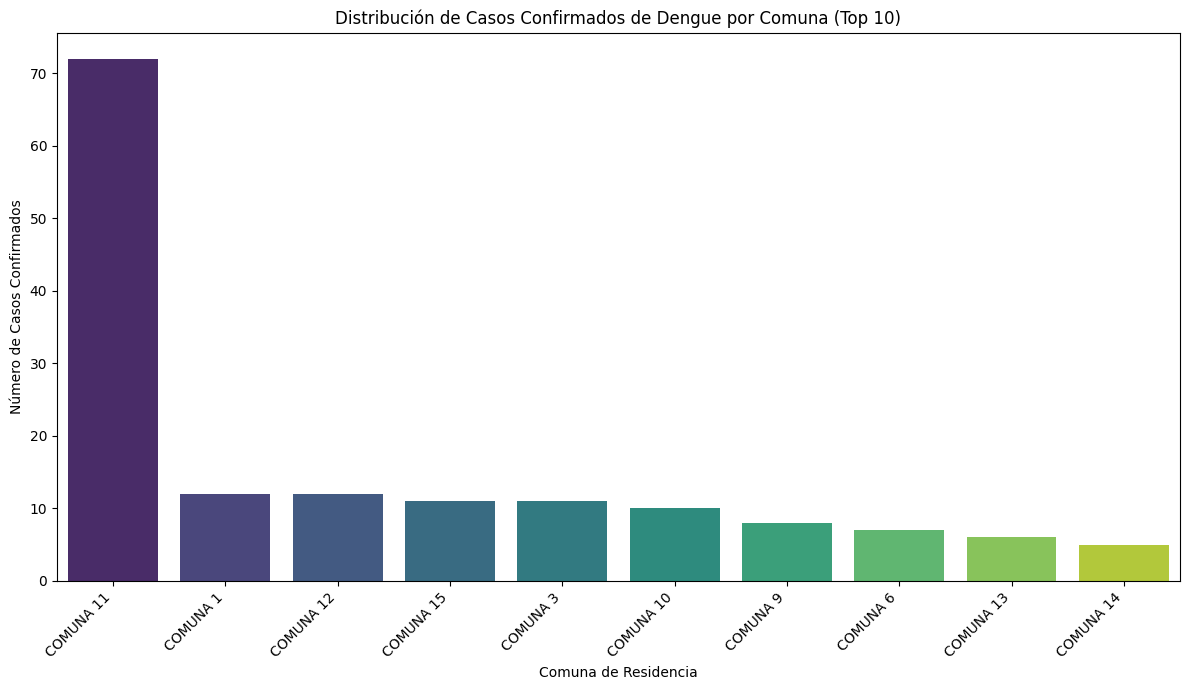

In [20]:
df_geo = df[df['departamento_residencia'] != 'SIN DATO'].groupby('departamento_residencia')['n_confirmados'].sum().sort_values(ascending=False).reset_index()
df_geo_plot = df_geo.head(10) # Mostrar el top 10

plt.figure(figsize=(12, 7))
sns.barplot(x='departamento_residencia', y='n_confirmados', data=df_geo_plot, palette='viridis')
plt.title('Distribución de Casos Confirmados de Dengue por Comuna (Top 10)')
plt.xlabel('Comuna de Residencia')
plt.ylabel('Número de Casos Confirmados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Gráfico de Distribución por Grupo Etario

Este gráfico muestra qué grupos de edad fueron los más afectados, destacando el segmento de 20 a 29 años.

/tmp/ipython-input-3800944740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo_etario', y='n_confirmados', data=df_age, palette='plasma')


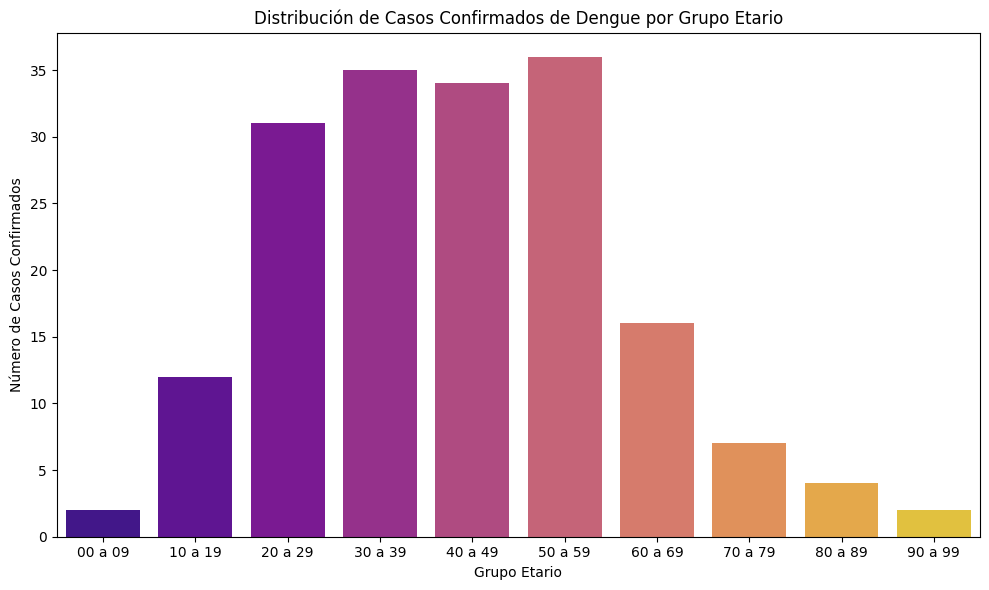

In [21]:
age_order = ['00 a 09', '10 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99']

df_age = df[df['grupo_etario'] != 'SIN DATO'].groupby('grupo_etario')['n_confirmados'].sum().reindex(age_order).fillna(0).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_etario', y='n_confirmados', data=df_age, palette='plasma')
plt.title('Distribución de Casos Confirmados de Dengue por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Casos Confirmados')
plt.tight_layout()
plt.show()

# Conclusiones del Análisis Descriptivo
Basado en la exploración inicial del dataset de casos de dengue en CABA, se desprenden las siguientes conclusiones para las hipótesis planteadas:

Evolución temporal de los casos y estacionalidad:

Los primeros casos confirmados en el período 2024-2025 se detectaron en la semana epidemiológica (SE) 41 de 2024 (inicios de octubre), marcando el inicio del brote en la temporada cálida.

El pico de incidencia se registró alrededor de la SE 14 de 2025 (finales de marzo/principios de abril), con un total de 18 casos reportados en esa semana. Este patrón confirma la fuerte estacionalidad del dengue, con una concentración máxima de contagios hacia el final del verano y el comienzo del otoño.

Comunas más afectadas por la incidencia del dengue:

La Comuna 11 muestra la mayor concentración de casos, con un total de 34 casos confirmados, siendo el área geográfica más impactada por el brote.

Esto sugiere que la incidencia geográfica es altamente desigual y concentrada, lo que permite focalizar las intervenciones de prevención y control de vectores.

Distribución de casos por grupo etario:

El Grupo Etario de 20 a 29 años registra el mayor número de casos, con 13 confirmados.

Esta concentración en población joven y económicamente activa podría estar relacionada con mayor movilidad o exposición en áreas de trabajo o estudio, lo que requiere campañas de concientización dirigidas a este segmento.